In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from load_data import load_data

In [2]:
df = load_data()

In [ ]:
# Identify top 10 customers by total revenue spent
top_10_customers = df.groupby('customer_id')['final_amount'].sum().nlargest(10).reset_index()
top_10_customers.columns = ['customer_id', 'total_revenue_spent']
top_10_customers

,customer_id,total_revenue_spent
0,CUST190,3864.5375
1,CUST161,3502.1195
2,CUST164,3369.4080
3,CUST144,3194.2590
4,CUST220,3124.8310
5,CUST160,3065.5775
6,CUST099,3002.9790
7,CUST015,2779.2545
8,CUST229,2769.2860
9,CUST192,2764.4425


In [4]:

customers_performence = df.groupby(top_10_customers['customer_id']).agg(
    {
        'order_id':['count'],
        'final_amount':['mean'],
        'product_category': lambda x: x.mode()[0]
    }
)

customers_performence.columns = [
    'total_orders',
    'avg_order_value',
    'preferred_category'
]

customers_performence


,total_orders,avg_order_value,preferred_category
customer_id,,,
CUST015,1,89.8600,Books
CUST099,1,277.5160,Home & Garden
CUST144,1,629.3500,Clothing
CUST160,1,314.6655,Home & Garden
CUST161,1,85.7400,Electronics
CUST164,1,697.8250,Books
CUST190,1,122.0100,Sports
CUST192,1,807.4425,Clothing
CUST220,1,97.1360,Sports


In [ ]:
# Identify top 10 products by total revenue
top_10_products = df.groupby('product_name')['final_amount'].sum().nlargest(10).reset_index()
top_10_products.columns= ['product_name', 'total_revenue']
top_10_products

,product_name,total_revenue
0,Product_21,8777.0170
1,Product_58,6699.0280
2,Product_2,6661.8990
3,Product_60,6580.9485
4,Product_36,6328.9880
5,Product_32,5616.1635
6,Product_92,5470.2370
7,Product_3,5409.5620
8,Product_99,5366.6440
9,Product_30,5303.5900


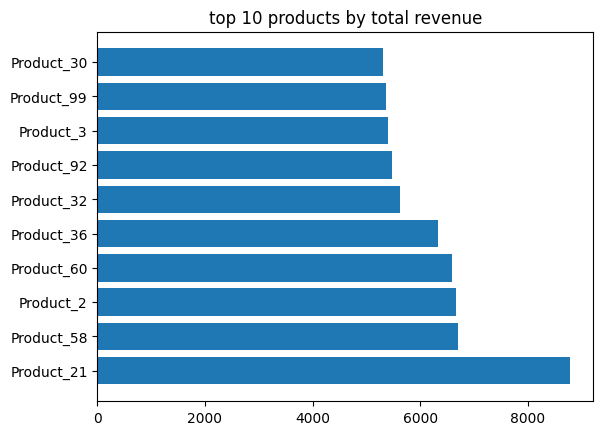

In [ ]:
# horizontal bar chart showing top 10 products
plt.barh(y=top_10_products['product_name'],width=top_10_products['total_revenue'])
plt.title('top 10 products by total revenue')
plt.show()

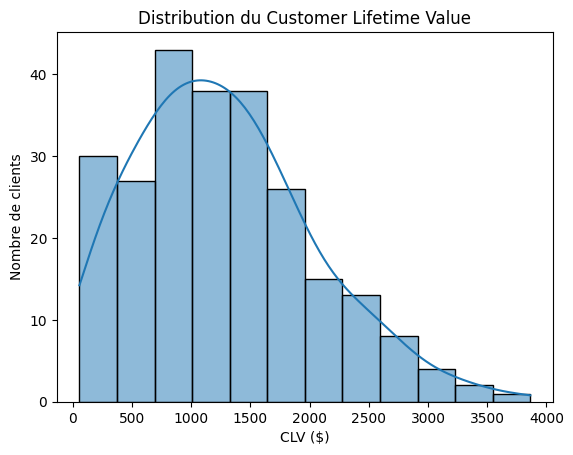

In [ ]:
# Calculate customer lifetime value distribution

#df.groupby('customer_id')['final_amount'].sum().hist(bins=20)
sns.histplot(data=df,x=df.groupby('customer_id')['final_amount'].sum(), kde=True)
plt.title('Distribution du Customer Lifetime Value')
plt.xlabel('CLV ($)')
plt.ylabel('Nombre de clients')
plt.show()


In [ ]:
# Identify repeat customers (customers with more than 3 orders)
customers_orders = df.groupby('customer_id')['order_id'].count().reset_index()
customers_orders.columns= ['customer_id', 'number_orders']

repeat_customers = customers_orders.query("number_orders > 3")
repeat_customers

,customer_id,number_orders
0,CUST001,5
1,CUST002,5
4,CUST005,5
7,CUST008,6
8,CUST009,5
...,...,...
238,CUST244,4
239,CUST245,4
241,CUST247,8
243,CUST249,5


In [9]:
repeat_customers.customer_id.nunique()

137